In [3]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install -U peft transformers

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [4]:
from diffusers import StableDiffusionPipeline
import torch

model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (128 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', open mouth, red eyes, ribbon, short dress, short sleeves, simple background, skin fang, smile, solo, standing, streaked hair, tail, two - tone hair, umamusume, white background, white dress, white hair']


  0%|          | 0/50 [00:00<?, ?it/s]

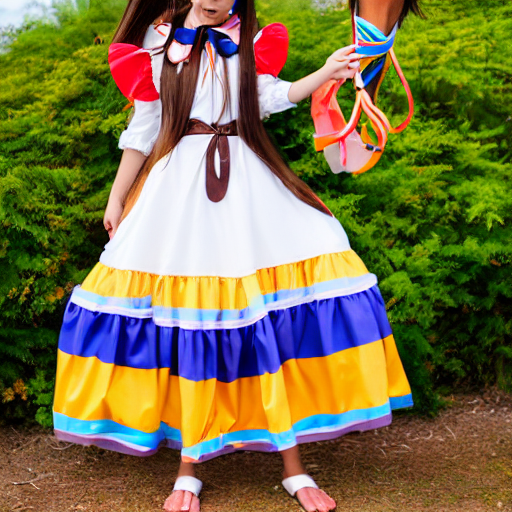

In [5]:
pipe = pipe.to("cuda")

prompt = "1girl, :d, ahoge, animal ears, belt, breasts, brown hair, copano rickey (umamusume), double bun, dress, fang, hair bun, hair ribbon, holding, holding flyer, horse ears, horse girl, horse tail, kannko bokujou, large breasts, leaning forward, long hair, multicolored hair, open mouth, red eyes, ribbon, short dress, short sleeves, simple background, skin fang, smile, solo, standing, streaked hair, tail, two-tone hair, umamusume, white background, white dress, white hair"
n_propmt = "(worst quality:2), (low quality:2), (normal quality:2), lowres, ((monochrome)), ((grayscale)), bad anatomy,DeepNegative, skin spots, acnes, skin blemishes,(fat:1.2),facing away, looking away,tilted head, lowres,bad anatomy,bad hands, missing fingers,extra digit, fewer digits,bad feet,poorly drawn hands,poorly drawn face,mutation,deformed,extra fingers,extra limbs,extra arms,extra legs,malformed limbs,fused fingers,too many fingers,long neck,cross-eyed,mutated hands,polar lowres,bad body,bad proportions,gross proportions,missing arms,missing legs,extra digit, extra arms, extra leg, extra foot,teethcroppe,signature, watermark, username,blurry,cropped,jpeg artifacts,text,error,"
image = pipe(prompt=prompt, negative_prompt=n_propmt).images[0]

image

In [6]:
from diffusers import AutoPipelineForText2Image
import torch

pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("/kaggle/input/fine-tune-lora-cartoon-new-zip/fine-tune-lora-cartoon_new", weight_name="pytorch_lora_weights.safetensors")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (128 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', open mouth, red eyes, ribbon, short dress, short sleeves, simple background, skin fang, smile, solo, standing, streaked hair, tail, two - tone hair, umamusume, white background, white dress, white hair']


  0%|          | 0/50 [00:00<?, ?it/s]

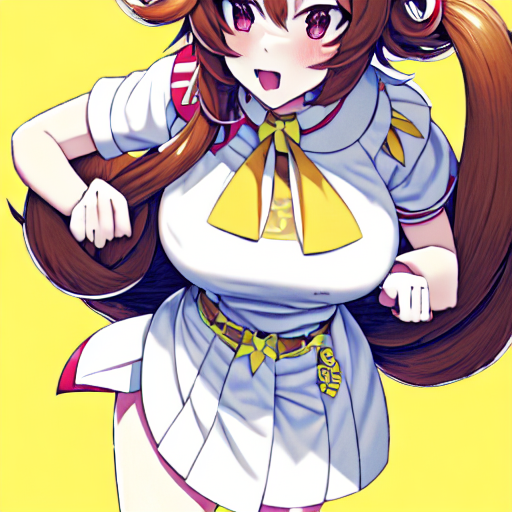

In [7]:

prompt = "1girl, :d, ahoge, animal ears, belt, breasts, brown hair, copano rickey (umamusume), double bun, dress, fang, hair bun, hair ribbon, holding, holding flyer, horse ears, horse girl, horse tail, kannko bokujou, large breasts, leaning forward, long hair, multicolored hair, open mouth, red eyes, ribbon, short dress, short sleeves, simple background, skin fang, smile, solo, standing, streaked hair, tail, two-tone hair, umamusume, white background, white dress, white hair"
n_propmt = "(worst quality:2), (low quality:2), (normal quality:2), lowres, ((monochrome)), ((grayscale)), bad anatomy,DeepNegative, skin spots, acnes, skin blemishes,(fat:1.2),facing away, looking away,tilted head, lowres,bad anatomy,bad hands, missing fingers,extra digit, fewer digits,bad feet,poorly drawn hands,poorly drawn face,mutation,deformed,extra fingers,extra limbs,extra arms,extra legs,malformed limbs,fused fingers,too many fingers,long neck,cross-eyed,mutated hands,polar lowres,bad body,bad proportions,gross proportions,missing arms,missing legs,extra digit, extra arms, extra leg, extra foot,teethcroppe,signature, watermark, username,blurry,cropped,jpeg artifacts,text,error,"
image = pipeline(prompt=prompt, negative_prompt=n_propmt).images[0]

image

In [9]:
from diffusers import AutoPipelineForText2Image
import torch
import os


prompts = [
    "katou megumi, 1girl, solo, bangs, brown hair, hat, white headwear, dress, white background, looking at viewer, simple background, brown eyes, open mouth, short hair, ribbon, jacket, red jacket, black ribbon, blush, open clothes, smile, beret, salute, open jacket, arm behind back, collarbone, neck ribbon, long sleeves, :d, upper body, <lora:Misaki Kurehito_XL:0.8>",
    "1girl, purple eyes, blush, long hair, twintails,  solo focus, brown hair, bow, bangs, hair between eyes, blue bow, nose blush,  light blush, :o, fang,  very long hair,  breasts,  blonde hair,  fangs,  outdoor, night, street, starry sky, bench, sitting., hooded jacket, casual,dark night ,night sky, arm hug, open jacket, pleated skirt",
    "masterpiece, best quality, detailed, 1girl, close up,curtained hair, blue eyes, brooch, laces, frilled sleeves, dress, village, bokeh, arms behind back,pastel colorstheme,",
    "masterpiece,best quality,StyleD01,1girl, solo, purple eyes, dress, short sleeves, green hair, pantyhose, twintails, hair ornament, long hair, hair flower, looking at viewer, flower, sitting, blush, ribbon, puffy sleeves, bangs, couch, indoors, purple dress, puffy short sleeves, closed mouth, frills, hair ribbon, white pantyhose, wrist cuffs, black ribbon, frilled dress, hair between eyes, window, on couch, breasts, hair intakes, feet out of frame, neck ribbon, choker, bow",
    "masterpiece,best quality,StyleD01,1girl, solo, thighhighs, long hair, flower, boots, breasts, hair ornament, looking at viewer, detached sleeves, hair flower, blush, torn clothes, white thighhighs, brown footwear, dress, cleavage, purple eyes, bangs, kneeling, hair between eyes, red flower, frills, all fours, petals, plant, medium breasts, white flower, closed mouth, bare shoulders, long sleeves, animal ears, outdoors, knee boots",
]

n_propmt = "(worst quality:2), (low quality:2), (normal quality:2), lowres, ((monochrome)), ((grayscale)), bad anatomy,DeepNegative, skin spots, acnes, skin blemishes,(fat:1.2),facing away, looking away,tilted head, lowres,bad anatomy,bad hands, missing fingers,extra digit, fewer digits,bad feet,poorly drawn hands,poorly drawn face,mutation,deformed,extra fingers,extra limbs,extra arms,extra legs,malformed limbs,fused fingers,too many fingers,long neck,cross-eyed,mutated hands,polar lowres,bad body,bad proportions,gross proportions,missing arms,missing legs,extra digit, extra arms, extra leg, extra foot,teethcroppe,signature, watermark, username,blurry,cropped,jpeg artifacts,text,error,"


base_dir = "/kaggle/input/fine-tune-lora-cartoon-new-zip/fine-tune-lora-cartoon_new"
output_base_dir = "/kaggle/working/"
end_output_dir = "/kaggle/working/output_file_checkpoint-10000000"

os.makedirs(end_output_dir, exist_ok=True)

pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5",
                                                     torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights(base_dir, weight_name="pytorch_lora_weights.safetensors")

for i, prompt in enumerate(prompts):
    output_file = os.path.join(end_output_dir, f"cartoon_{i + 1}.png")
    print(f"Generating image for prompt {i + 1}")
    image = pipeline(prompt=prompt, negative_prompt=n_propmt).images[0]
    image.save(output_file)

checkpoints = [f for f in os.listdir(base_dir)
               if os.path.isdir(os.path.join(base_dir, f)) and f.startswith('checkpoint')]
checkpoints = sorted(checkpoints, key=lambda x: int(x.split('-')[1]))

# delete sort element
checkpoints = [checkpoints[i] for i in range(len(checkpoints)) if i % 10 == 0]
print(checkpoints)

for checkpoint in checkpoints:
    checkpoint_path = os.path.join(base_dir, checkpoint)
    output_dir = os.path.join(output_base_dir, f"output_file_{checkpoint}")

    os.makedirs(output_dir, exist_ok=True)

    print(f"Processing checkpoint: {checkpoint}")
    pipeline = AutoPipelineForText2Image.from_pretrained("runwayml/stable-diffusion-v1-5",
                                                         torch_dtype=torch.float16).to("cuda")
    pipeline.load_lora_weights(checkpoint_path, weight_name="pytorch_lora_weights.safetensors")

    for i, prompt in enumerate(prompts):
        output_file = os.path.join(output_dir, f"cartoon_{i + 1}.png")
        if not os.path.exists(output_file):
            print(f"Generating image for prompt {i + 1} using checkpoint {checkpoint}")
            image = pipeline(prompt=prompt, negative_prompt=n_propmt).images[0]
            image.save(output_file)
        else:
            print(f"Image for prompt {i + 1} using checkpoint {checkpoint} already exists, skipping.")

print("All images generated and saved.")



Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['night sky, arm hug, open jacket, pleated skirt']


Generating image for prompt 2


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 3


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, white pantyhose, wrist cuffs, black ribbon, frilled dress, hair between eyes, window, on couch, breasts, hair intakes, feet out of frame, neck ribbon, choker, bow']


Generating image for prompt 4


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ours, petals, plant, medium breasts, white flower, closed mouth, bare shoulders, long sleeves, animal ears, outdoors, knee boots']


Generating image for prompt 5


  0%|          | 0/50 [00:00<?, ?it/s]

['checkpoint-500', 'checkpoint-5500', 'checkpoint-10500']
Processing checkpoint: checkpoint-500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (89 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['night sky, arm hug, open jacket, pleated skirt']


Image for prompt 1 using checkpoint checkpoint-500 already exists, skipping.
Generating image for prompt 2 using checkpoint checkpoint-500


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 3 using checkpoint checkpoint-500


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, white pantyhose, wrist cuffs, black ribbon, frilled dress, hair between eyes, window, on couch, breasts, hair intakes, feet out of frame, neck ribbon, choker, bow']


Generating image for prompt 4 using checkpoint checkpoint-500


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ours, petals, plant, medium breasts, white flower, closed mouth, bare shoulders, long sleeves, animal ears, outdoors, knee boots']


Generating image for prompt 5 using checkpoint checkpoint-500


  0%|          | 0/50 [00:00<?, ?it/s]

Processing checkpoint: checkpoint-5500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-5500


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['night sky, arm hug, open jacket, pleated skirt']


Generating image for prompt 2 using checkpoint checkpoint-5500


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 3 using checkpoint checkpoint-5500


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, white pantyhose, wrist cuffs, black ribbon, frilled dress, hair between eyes, window, on couch, breasts, hair intakes, feet out of frame, neck ribbon, choker, bow']


Generating image for prompt 4 using checkpoint checkpoint-5500


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ours, petals, plant, medium breasts, white flower, closed mouth, bare shoulders, long sleeves, animal ears, outdoors, knee boots']


Generating image for prompt 5 using checkpoint checkpoint-5500


  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


Processing checkpoint: checkpoint-10500


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (104 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, long sleeves, : d, upper body, < lora : misaki kurehito _ xl : 0. 8 >']


Generating image for prompt 1 using checkpoint checkpoint-10500


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['night sky, arm hug, open jacket, pleated skirt']


Generating image for prompt 2 using checkpoint checkpoint-10500


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image for prompt 3 using checkpoint checkpoint-10500


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ribbon, white pantyhose, wrist cuffs, black ribbon, frilled dress, hair between eyes, window, on couch, breasts, hair intakes, feet out of frame, neck ribbon, choker, bow']


Generating image for prompt 4 using checkpoint checkpoint-10500


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ours, petals, plant, medium breasts, white flower, closed mouth, bare shoulders, long sleeves, animal ears, outdoors, knee boots']


Generating image for prompt 5 using checkpoint checkpoint-10500


  0%|          | 0/50 [00:00<?, ?it/s]

All images generated and saved.


In [ ]:
import os
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import re  # Import regex for pattern matching

def merge_images_horizontally(images):
    widths, heights = zip(*(i.size for i in images))
    total_width = sum(widths)
    max_height = max(heights)

    new_image = Image.new('RGB', (total_width, max_height))
    x_offset = 0
    for img in images:
        new_image.paste(img, (x_offset, 0))
        x_offset += img.width
    return new_image

def merge_images_vertically(images):
    widths, heights = zip(*(i.size for i in images))
    max_width = max(widths)
    total_height = sum(heights)

    new_image = Image.new('RGB', (max_width, total_height))
    y_offset = 0
    for img in images:
        new_image.paste(img, (0, y_offset))
        y_offset += img.height
    return new_image

def add_labels(image, x_labels, y_labels, label_width=150, label_height=100, font_size=30):
    img_with_labels = Image.new('RGB', (image.width + label_width, image.height + label_height), (255, 255, 255))
    img_with_labels.paste(image, (label_width, label_height))

    draw = ImageDraw.Draw(img_with_labels)

    try:
        font = ImageFont.truetype("arial.ttf", font_size)
    except IOError:
        font = ImageFont.load_default()

    x_label_width = image.width // len(x_labels)
    for i, label in enumerate(x_labels):
        bbox = draw.textbbox((0, 0), label, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        x_position = label_width + (i * x_label_width) + (x_label_width - text_width) // 2
        y_position = label_height // 2 - text_height // 2
        draw.text((x_position, y_position), label, fill="black", font=font)

    y_label_height = image.height // len(y_labels)
    for i, label in enumerate(y_labels):
        bbox = draw.textbbox((0, 0), label, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]
        x_position = 10
        y_position = label_height + (i * y_label_height) + (y_label_height - text_height) // 2
        draw.text((x_position, y_position), label, fill="black", font=font)

    return img_with_labels

def main(input_folder, output_file):
    subfolders = [f.path for f in os.scandir(input_folder) if f.is_dir()]

    subfolders = [folder for folder in subfolders if re.search(r'-\d+$', os.path.basename(folder))]

    subfolders.sort(key=lambda folder: int(re.search(r'-\d+$', os.path.basename(folder)).group()[1:]))

    combined_images = []
    x_labels = []  
    y_labels = []  

    for folder in subfolders:
        images = []
        files = sorted([f for f in os.listdir(folder) if f.endswith('.png')])
        x_labels = [f for f in files]  

        for file in files:
            img_path = os.path.join(folder, file)
            img = Image.open(img_path)
            images.append(img)

        combined_img = merge_images_horizontally(images)
        combined_images.append(combined_img)

    y_labels = [os.path.basename(folder).replace('output_file_checkpoint-', '') for folder in subfolders]

    final_image = merge_images_vertically(combined_images)

    final_image_with_labels = add_labels(final_image, x_labels, y_labels, label_width=150, label_height=100, font_size=30)

    final_image_with_labels.save(output_file)

input_folder = '/kaggle/working'
output_file = '/kaggle/working/final_combined_image_with_labels.png'
main(input_folder, output_file)

img = Image.open(output_file)
plt.imshow(img)
plt.axis('off')
plt.show()
